In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data=pd.read_csv('/Users/hakangurler/Desktop/flights_train.csv') 
data.shape 

(132, 2)

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail()) 

            passengers
date                  
1949-01-01          64
1949-02-01          75
1949-03-01          98
1949-04-01          93
1949-05-01          80
            passengers
date                  
1959-08-01         430
1959-09-01         383
1959-10-01         351
1959-11-01         323
1959-12-01         350


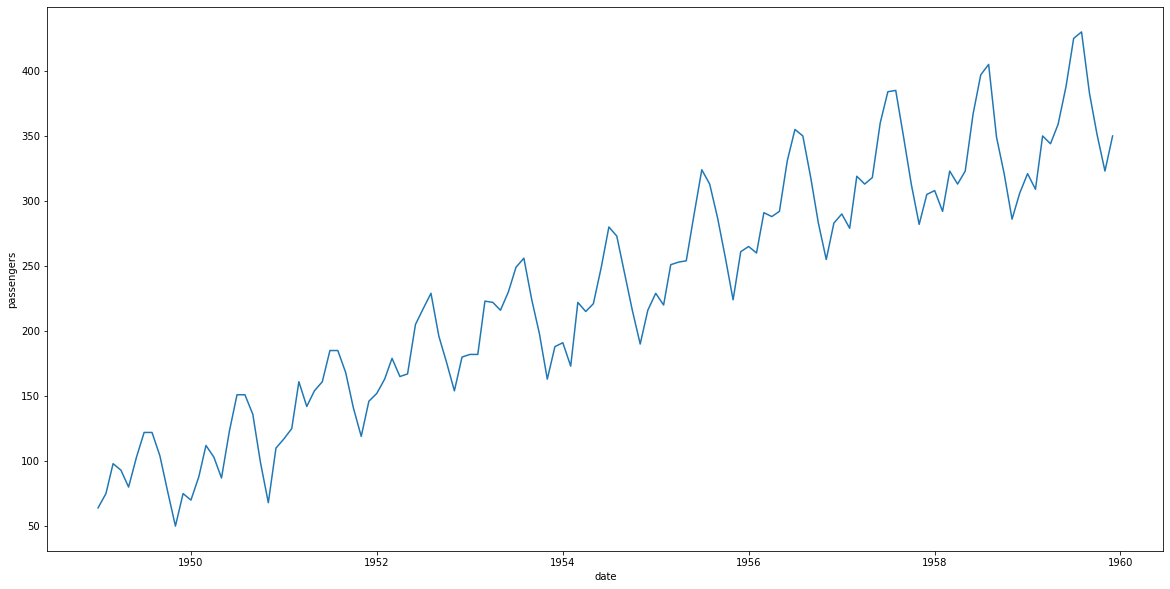

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("passengers")
plt.plot(data)

In [6]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))


            passengers
date                  
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   88.583333
1950-01-01   89.083333
1950-02-01   90.166667
1950-03-01   91.333333
            passengers
date                  
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   22.272928
1950-01-01   21.731662
1950-02-01   21.285220
1950-03-01   22.120880


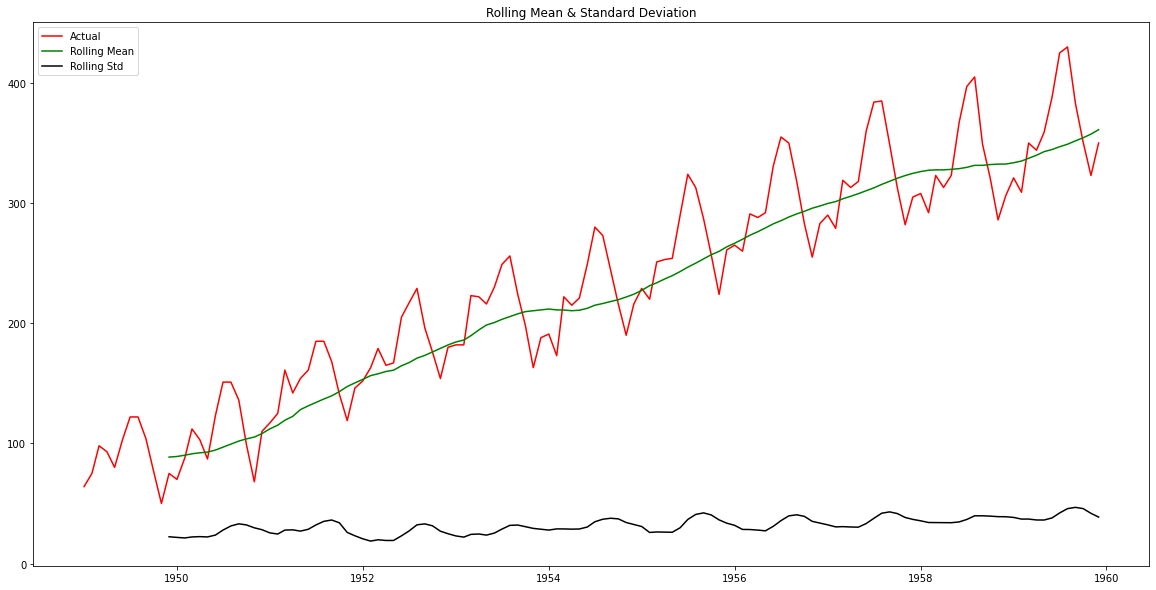

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False) 

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.946837
p-value                   0.772157
Lags Used                13.000000
No. of Obs              118.000000
Critical Value (1%)      -3.487022
Critical Value (5%)      -2.886363
Critical Value (10%)     -2.580009
dtype: float64


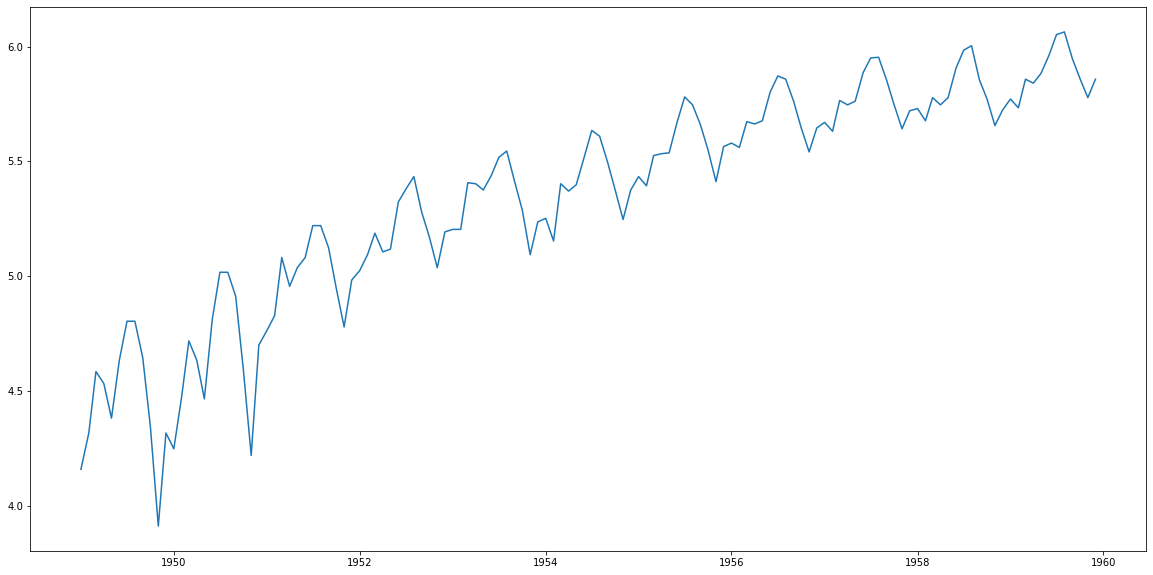

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log) 

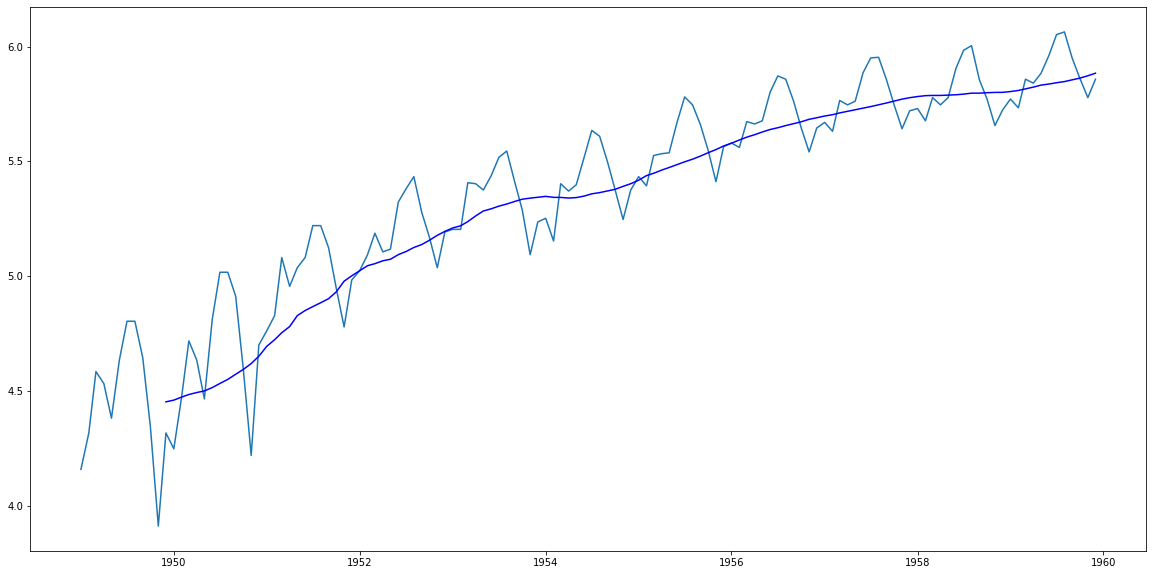

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue') 

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12) 

,passengers
date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head() 

,passengers
date,
1949-12-01,-0.135549
1950-01-01,-0.212009
1950-02-01,0.003511
1950-03-01,0.233546
1950-04-01,0.141265


In [16]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

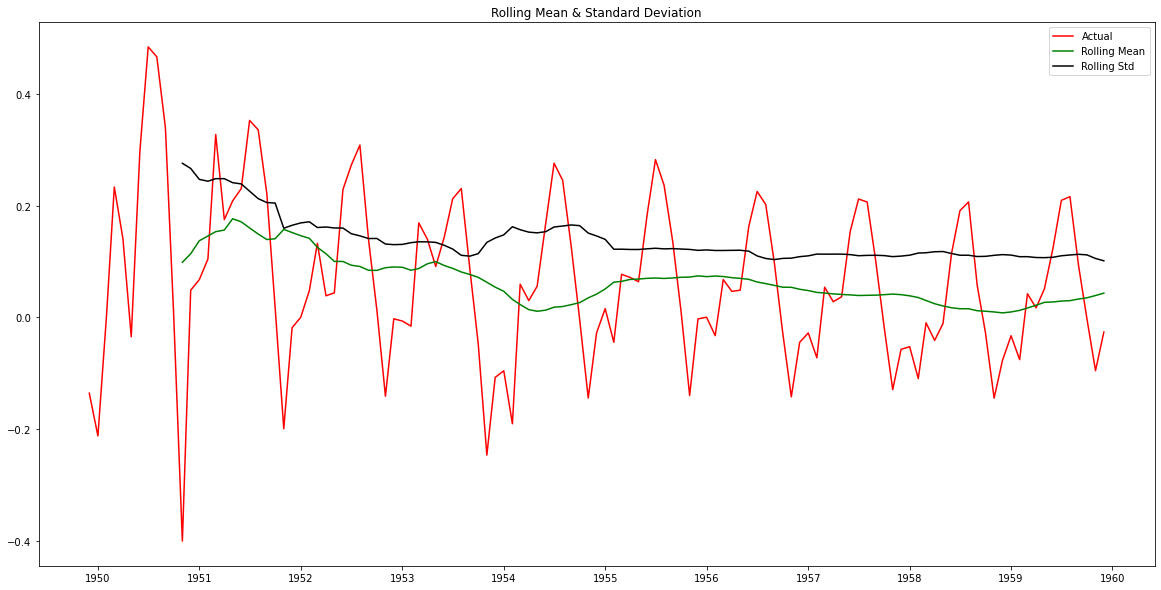

Dickey-Fuller Test: 
Test Statistic           -2.607477
p-value                   0.091462
Lags Used                13.000000
No. of Obs              107.000000
Critical Value (1%)      -3.492996
Critical Value (5%)      -2.888955
Critical Value (10%)     -2.581393
dtype: float64


In [17]:
stationarity(data_log_diff) 

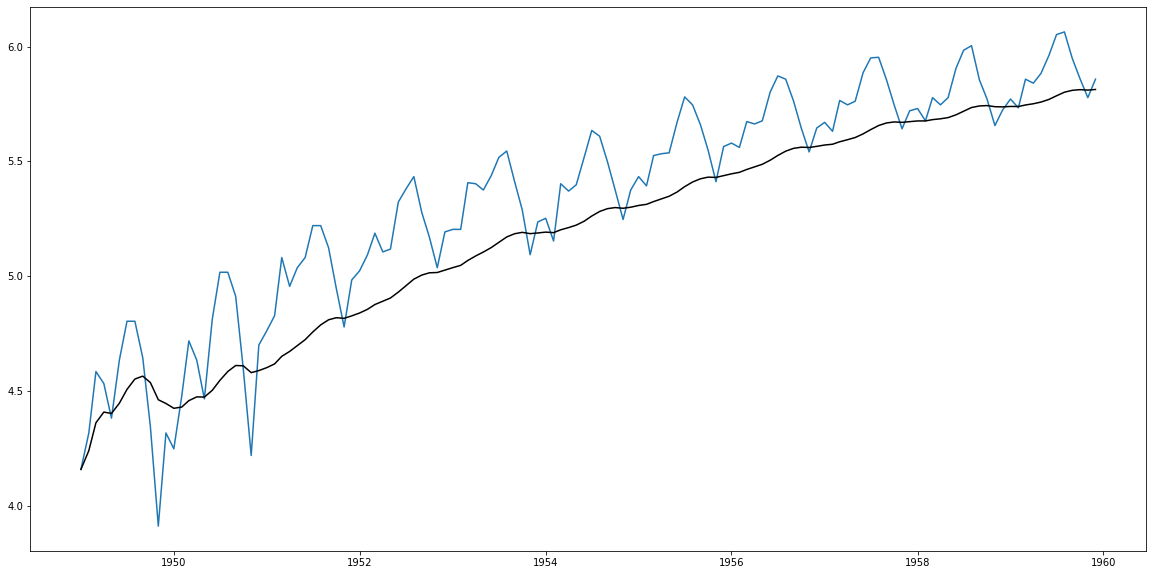

In [18]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black') 

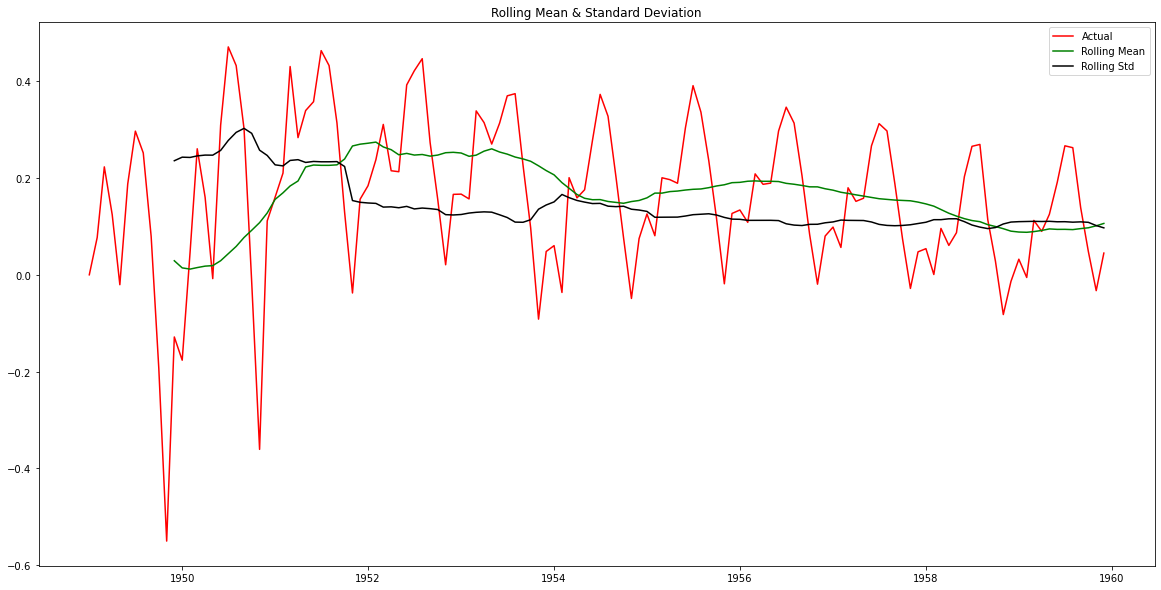

Dickey-Fuller Test: 
Test Statistic           -2.950970
p-value                   0.039734
Lags Used                13.000000
No. of Obs              118.000000
Critical Value (1%)      -3.487022
Critical Value (5%)      -2.886363
Critical Value (10%)     -2.580009
dtype: float64


In [19]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff) 

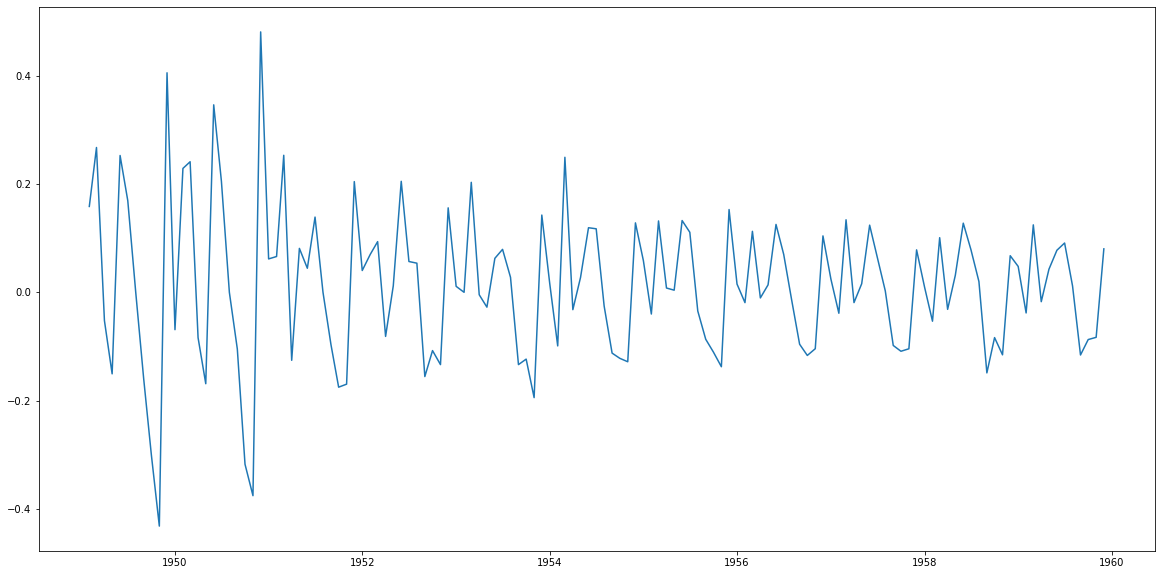

In [20]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift) 

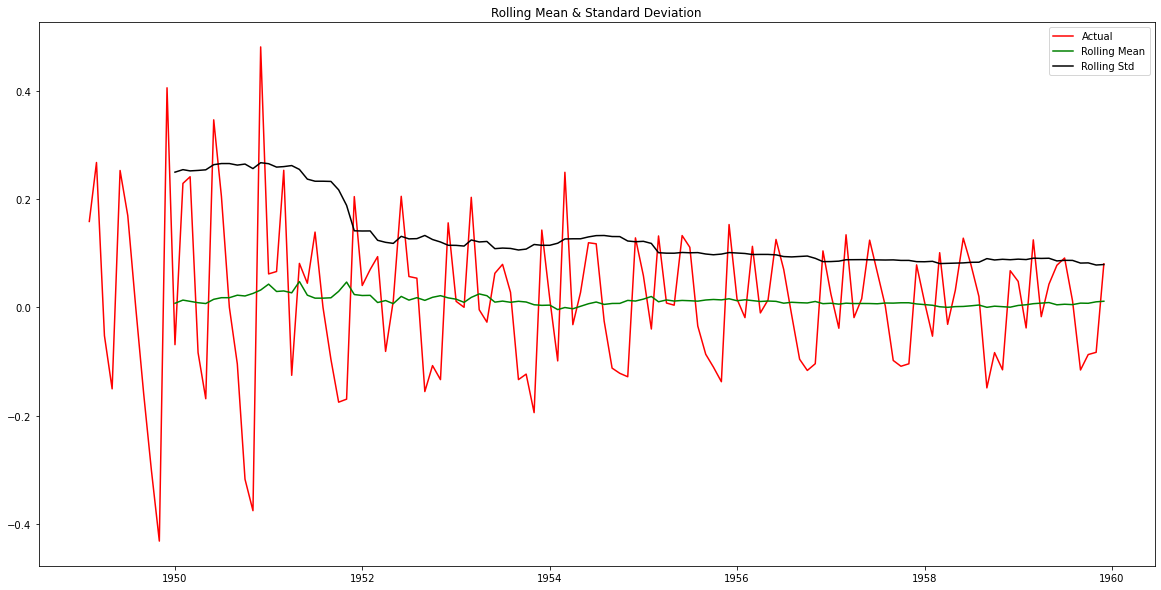

Dickey-Fuller Test: 
Test Statistic           -2.403403
p-value                   0.140778
Lags Used                12.000000
No. of Obs              118.000000
Critical Value (1%)      -3.487022
Critical Value (5%)      -2.886363
Critical Value (10%)     -2.580009
dtype: float64


In [21]:
data_shift=data_shift.dropna()
stationarity(data_shift)

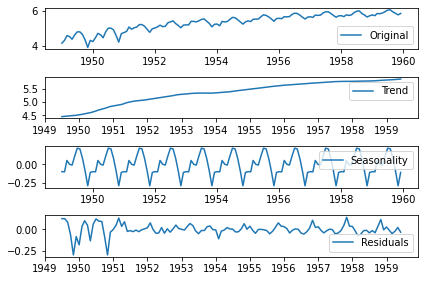

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

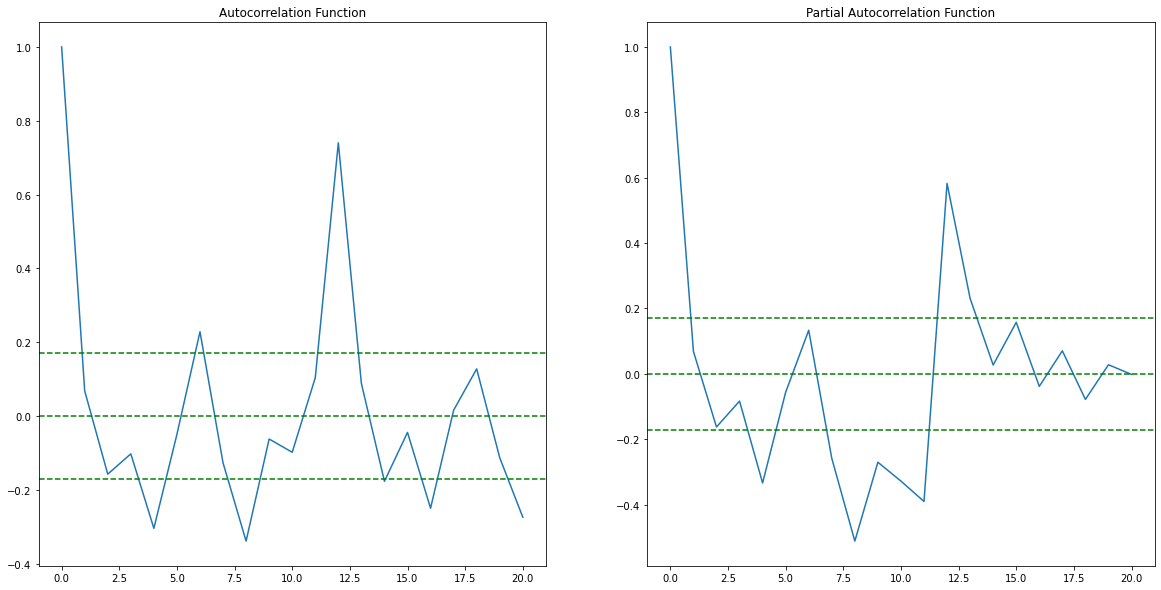

In [23]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

/Users/hakangurler/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/hakangurler/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


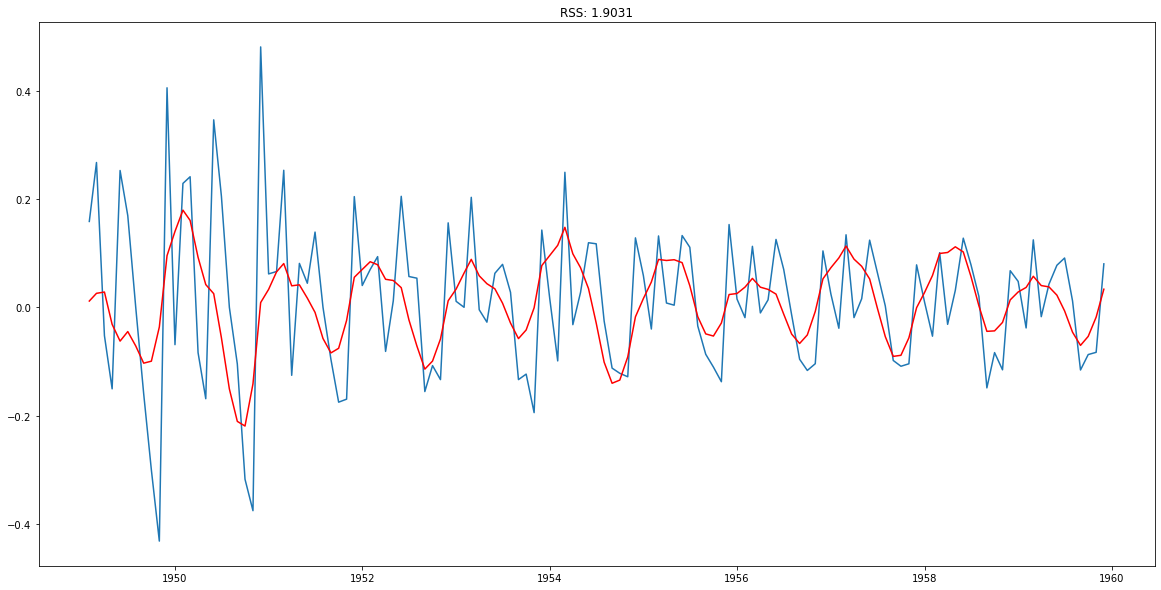

In [26]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['passengers'])**2))
print('plotting ARIMA model')

In [27]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())


date
1949-02-01    0.011578
1949-03-01    0.025847
1949-04-01    0.028204
1949-05-01   -0.031503
1949-06-01   -0.062412
dtype: float64


In [34]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head()) 

date
1949-02-01    0.011578
1949-03-01    0.037426
1949-04-01    0.065630
1949-05-01    0.034127
1949-06-01   -0.028285
dtype: float64


In [36]:
df = pd.read_csv('/Users/hakangurler/Desktop/flights_train.csv') 

In [38]:
predictions_log=pd.Series(data_log['passengers'], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head() 

date
1949-01-01    4.158883
1949-02-01    4.329067
1949-03-01    4.622393
1949-04-01    4.598229
1949-05-01    4.416154
dtype: float64

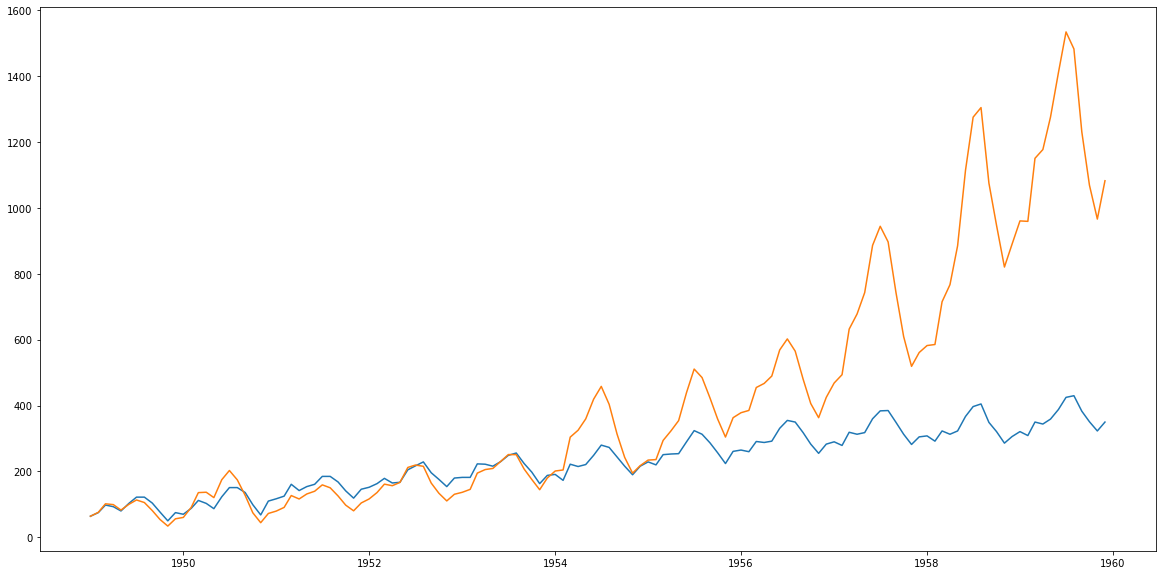

In [39]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA) 

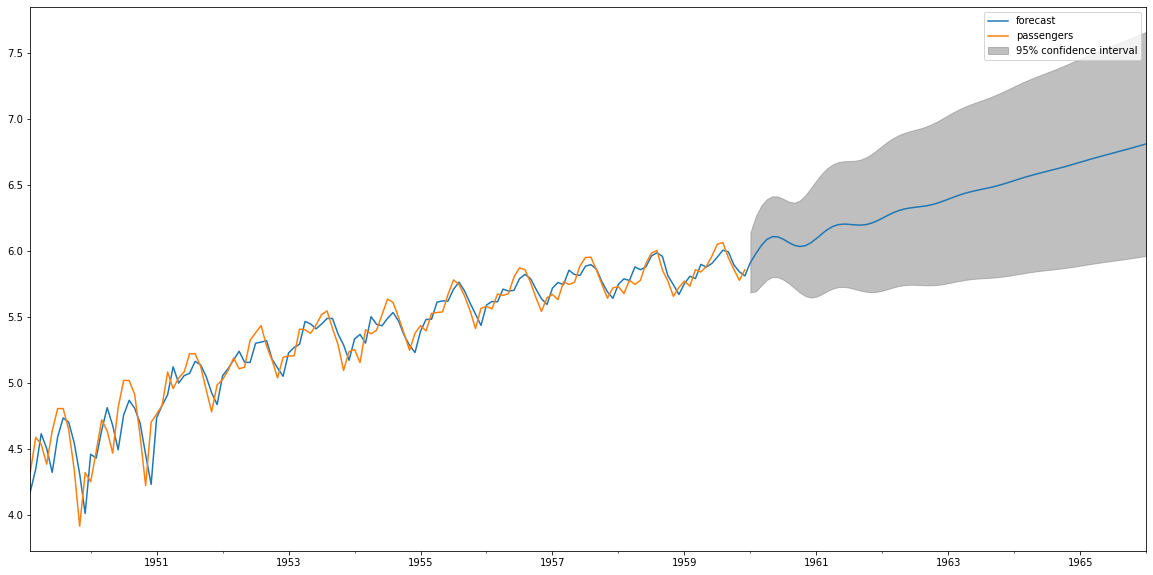

In [40]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120) 

In [41]:
x[0] 

array([5.91310328, 5.97988758, 6.0422654 , 6.08749305, 6.10901327,
       6.1073565 , 6.08906335, 6.06417303, 6.04312643, 6.03397375,
       6.04057913, 6.06216104, 6.09411239, 6.12971559, 6.16218438,
       6.18645321, 6.2002784 , 6.20445314, 6.20219742, 6.19799191,
       6.19623563, 6.20010266, 6.21087161, 6.22784111, 6.24877596,
       6.27069658, 6.29075922, 6.30698408, 6.31866027, 6.32636435,
       6.33163863, 6.33645867, 6.34265767, 6.35146435, 6.36326067,
       6.37759367, 6.39340488, 6.40938817, 6.42436515, 6.43757748,
       6.44883013, 6.45846803, 6.46721405, 6.47592937, 6.48536918,
       6.49599865, 6.50790924, 6.52084423, 6.53431211, 6.54774666,
       6.56066535, 6.57278489, 6.58406912, 6.59470583, 6.60502781,
       6.61540636, 6.62614881, 6.63742629, 6.64924695, 6.66147533,
       6.67388697, 6.68623901, 6.69833642, 6.71007676, 6.72146484,
       6.73259724, 6.74362485, 6.75470606, 6.76596422, 6.77745995,
       6.7891835 , 6.80106666, 6.81300835, 6.82490555, 6.83668

In [42]:
np.exp(x[0])
 

array([ 369.85213003,  395.39591689,  420.84533864,  440.316174  ,
        449.8945715 ,  449.14981586,  441.00814657,  430.16679694,
        421.20785332,  417.37026341,  420.1362782 ,  429.30217617,
        443.24044382,  459.30551231,  474.46335392,  486.1188852 ,
        492.88623946,  494.94821651,  493.8330085 ,  491.76055113,
        490.89764018,  492.79963117,  498.13524242,  506.66047948,
        517.37914631,  528.84563158,  539.56282152,  548.38855532,
        554.82917119,  559.12012879,  562.07687451,  564.79264879,
        568.30467166,  573.33165505,  580.1349029 ,  588.50985157,
        597.88885821,  607.52186426,  616.68918955,  624.89115192,
        631.96254578,  638.08278232,  643.68794733,  649.32240824,
        655.48091169,  662.48548539,  670.42325859,  679.15150078,
        688.36010351,  697.67031087,  706.74177182,  715.3592686 ,
        723.47726424,  731.21375219,  738.80041282,  746.50802333,
        754.5705704 ,  763.12839201,  772.20259651,  781.70335